<a href="https://colab.research.google.com/github/wateryhcho/Colaboratory/blob/main/ipynb/Introduction_to_Earth_Engine_%2B_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook gives a brief introduction of using Colab with Earth Engine and is available at: https://g.co/earth/colab-ee

# Colab Basics


## Basic example

Define a few variables:

In [1]:
# This is a code block.
a = 100
b = 80

Perform some basic math...

$nd=\frac{a - b}{a + b}$

In [2]:
nd = (a - b) / (a + b)
print(nd)

0.1111111111111111


## Installing Python Packages

In [3]:
!pip install xkcd

  Created wheel for xkcd: filename=xkcd-2.4.2-py3-none-any.whl size=9195 sha256=e72bfca09e348127eee444e2f07affed1315623a6bf0ef461ed3b7376b4f27ff
  Stored in directory: /root/.cache/pip/wheels/ba/62/74/4808cbf8cf843406a45b1671e9da7ed7beb13dfcb24938745d
Successfully built xkcd


In [4]:
import xkcd
from IPython.display import HTML
from IPython.display import Image

In [5]:
comic = xkcd.getRandomComic()
comic

Comic object for https://www.xkcd.com/1840

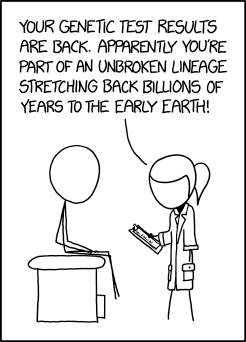

In [6]:
Image(comic.getImageLink())

In [7]:
#@title XKCD License
HTML('''
  This work is licensed under a <a href="http://creativecommons.org/licenses/by-nc/2.5/">Creative Commons Attribution-NonCommercial 2.5 License</a>.
  ''')

## Additional Rich Text Elements 

We can use Colab to display a Google Slides document that discusses how to use Colab. (Quite circular, I know...)

To display slides, we can use the [IFrame](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#IPython.display.IFrame) class in the [IPython display](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html) module.

In [8]:
from IPython.display import IFrame
from IPython.display import HTML

google_slides_URL =  "https://docs.google.com/presentation/d/e/2PACX-1vQiVxi1IywSVdk8-zmbjz3MiKe_hX8jAryEVIN2kJKUUKTxgWZUIKev57m6H1-UoXO5V49RQLWD4pbm/embed?slide=id.g96bfef2eea_0_18"
display(
    IFrame(src=google_slides_URL, 
               width=800, 
               height=500),
    HTML('''<a href="{0}" target="_blank">Here is a link to open the slides in a new tab.</a>
         '''.format(google_slides_URL))
)

# Earth Engine Basics

Import the Python packages and modules that will be used in this notebook.

In [9]:
import ee                          # Earth Engine client library
import folium                      # For displaying an interactive map

## Initialize Earth Engine

Authorize access to Earth Engine. 

In [10]:
ee.Authenticate()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=YI1uFWFTZjdHpBxXUdq8DJwJlH4OqpnBu5ca1FtIP5Y&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AX4XfWgCl7IvMBUDUnDruicOq10OS4xcnqoXxpUC2K8c7cFqgHezIlncFPE

Successfully saved authorization token.


Initialize the Earth Engine package, which creates objects and methods based on what is currently available the backend servers.

In [11]:
ee.Initialize()

## Analysis

### Define an image object

Load up a simple image, using an Image ID.

The ID string `"USGS/SRTMGL1_003"` can be found on the [NASA SRTM Digital Elevation 30m](https://developers.google.com/earth-engine/datasets/catalog/USGS_SRTMGL1_003) dataset description page of the [Earth Engine Data Catalog](https://developers.google.com/earth-engine/datasets/catalog/).

In [12]:
dem = ee.Image("USGS/SRTMGL1_003")

### Print information about the image object

Print out the definition of the object.

In [13]:
print(dem)

ee.Image({
  "functionInvocationValue": {
    "functionName": "Image.load",
    "arguments": {
      "id": {
        "constantValue": "USGS/SRTMGL1_003"
      }
    }
  }
})


Print out metadata for the object. The method [getInfo()](https://developers.google.com/earth-engine/apidocs/ee-image-getinfo) is used to request information about an object from the Earth Engine backend servers.

In [14]:
dem.getInfo()

{'bands': [{'crs': 'EPSG:4326',
   'crs_transform': [0.0002777777777777778,
    0,
    -180.0001388888889,
    0,
    -0.0002777777777777778,
    60.00013888888889],
   'data_type': {'max': 32767,
    'min': -32768,
    'precision': 'int',
    'type': 'PixelType'},
   'dimensions': [1296001, 417601],
   'id': 'elevation'}],
 'id': 'USGS/SRTMGL1_003',
 'properties': {'date_range': [950227200000, 951177600000],
  'description': '<p>The Shuttle Radar Topography Mission (SRTM, see <a href="https://onlinelibrary.wiley.com/doi/10.1029/2005RG000183/full">Farr\net al. 2007</a>)\ndigital elevation data is an international research effort that\nobtained digital elevation models on a near-global scale. This\nSRTM V3 product (SRTM Plus) is provided by NASA JPL\nat a resolution of 1 arc-second (approximately 30m).</p><p>This dataset has undergone a void-filling process using open-source data\n(ASTER GDEM2, GMTED2010, and NED), as opposed to other versions that\ncontain voids or have been void-fille

### Display a static image 

In [15]:
# Set visualization parameters and convert to a 3-band RGB image.
vis_params = {
  'bands': 'elevation',
  'min': 0,
  'max': 4000,
  'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']
}
rgb = dem.visualize(**vis_params)
# Display the image.
Image(url = rgb.getThumbURL({'dimensions': 512}))

### Display an interactive map

By default, Colab includes the [`folium`](https://python-visualization.github.io/folium/) package, which can be used to create interactive maps. The following cell adds a method (`add_ee_layer`) for displaying Earth Engine tiles.

In [16]:
# Define a method for displaying Earth Engine image tiles to folium map.
def add_ee_layer(self, ee_image_object, vis_params, name):
  map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
  folium.raster_layers.TileLayer(
    tiles = map_id_dict['tile_fetcher'].url_format,
    attr = 'Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    name = name,
    overlay = True,
    control = True
  ).add_to(self)
folium.Map.add_ee_layer = add_ee_layer

In [17]:
# Create a folium map object.
my_map = folium.Map(location=[20, 0], zoom_start=3, height=500)

# Add the elevation model to the map object.
my_map.add_ee_layer(dem.updateMask(dem.gt(0)), vis_params, 'DEM')

# Display the map in the notebook.
display(my_map)

# Collaboration Features

## Saving options

* Save a copy in Drive
* Save as a GitHub Gist
* Save a copy in GitHub



## Adding Comments

* Notebooks saved on Google Drive allows for file sharing and comments.

# So much more to explore...

In [18]:
dir(ee.Image)

['And',
 'Not',
 'Or',
 '_HAS_DYNAMIC_ATTRIBUTES',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply_crs_and_affine',
 '_apply_selection_and_scale',
 '_apply_spatial_transformations',
 '_apply_visualization',
 '_build_download_id_image',
 '_cast',
 '_initialized',
 'abs',
 'acos',
 'add',
 'addBands',
 'arrayAccum',
 'arrayArgmax',
 'arrayCat',
 'arrayDimensions',
 'arrayDotProduct',
 'arrayFlatten',
 'arrayGet',
 'arrayLength',
 'arrayLengths',
 'arrayMask',
 'arrayPad',
 'arrayProject',
 'arrayReduce',
 'arrayRepeat',
 'arrayReshape',
 'arraySlice',
 'arraySort',
 'arrayTranspose',
 'aside',
 'asin',
 'atan',
 'atan2',
 'bandNames',
 'bandTypes',
 'bitCount',
 

# Wrapping Up

## ***Thank you!***